<a href="https://colab.research.google.com/github/psubedicsu/Final-Project---608/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import pandas as pd

df = pd.read_csv("Crop_recommendation.csv")
df = df.rename(columns=str.lower).drop_duplicates().dropna()

df.shape

(2200, 8)

In [ ]:
num_cols = ["n","p","k","temperature","humidity","ph","rainfall"]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna()

df[num_cols].dtypes

,0
n,int64
p,int64
k,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64


In [ ]:
df["label"] = df["label"].astype("category")

df["label"].notna().all(), df["label"].nunique(), df.shape

(np.True_, 22, (2200, 8))

# Data Analysis 1 - Descriptive

In [10]:
import matplotlib.pyplot as plt

cols = ["n","p","k","temperature","humidity","ph","rainfall"]
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
n,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
p,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
k,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


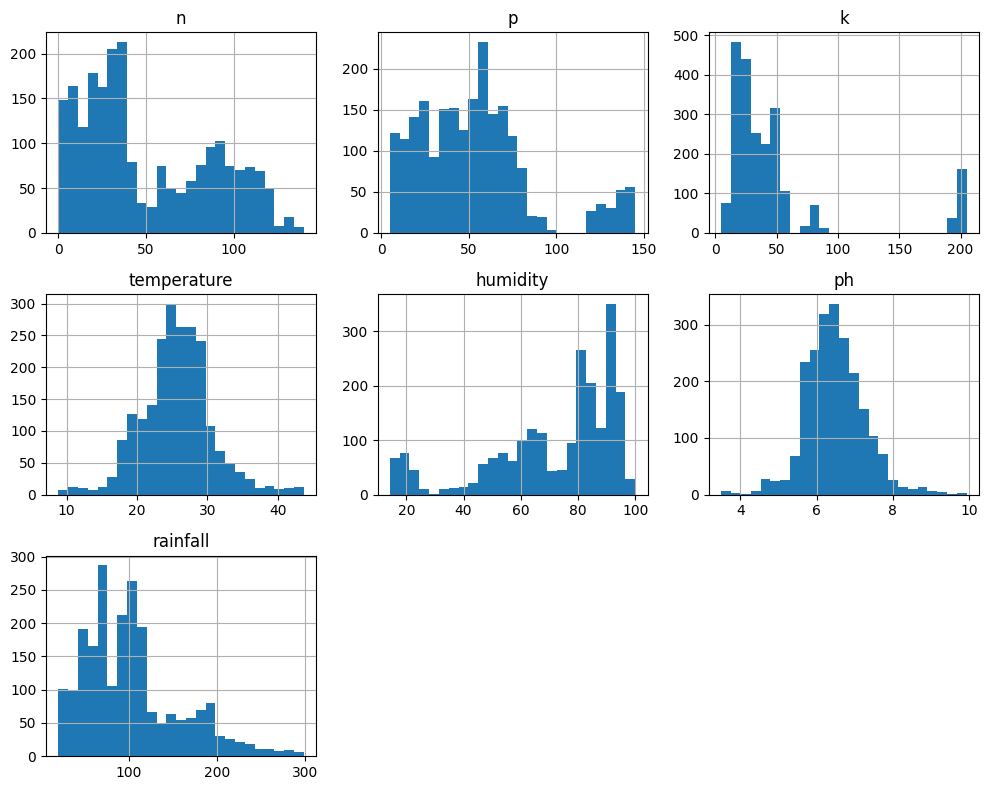

In [9]:
df[cols].hist(bins=25, figsize=(10,8))
plt.tight_layout()
plt.show()

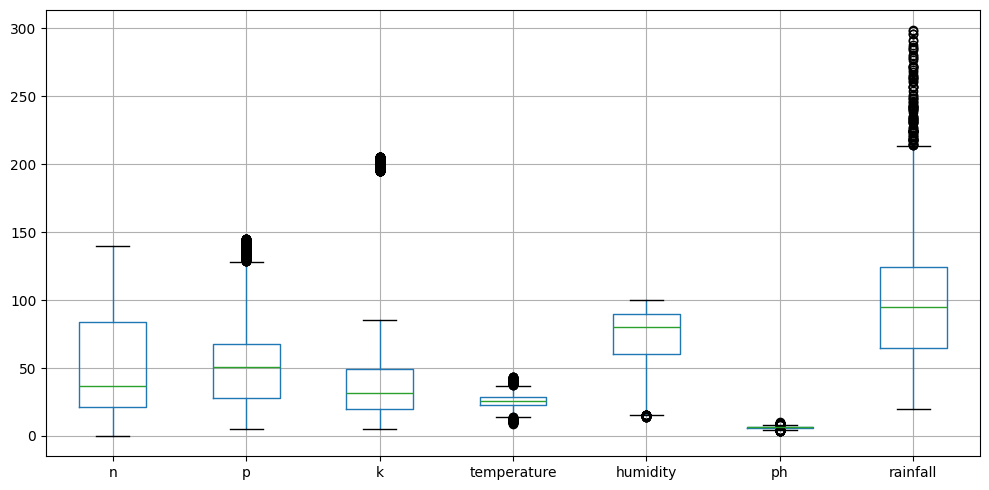

In [11]:
plt.figure(figsize=(10,5))
df[cols].boxplot()
plt.tight_layout()
plt.show()

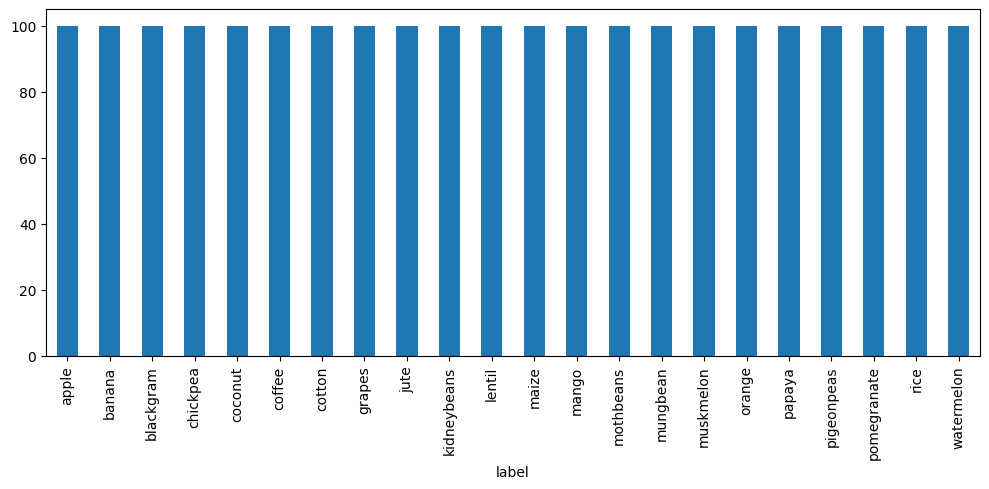

In [12]:
counts = df["label"].value_counts()

plt.figure(figsize=(10,5))
counts.plot(kind="bar")
plt.tight_layout()
plt.show()

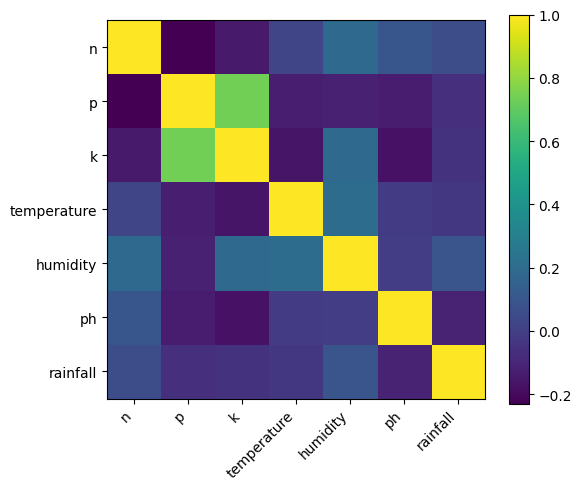

In [13]:
corr = df[cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.colorbar()
plt.tight_layout()
plt.show()

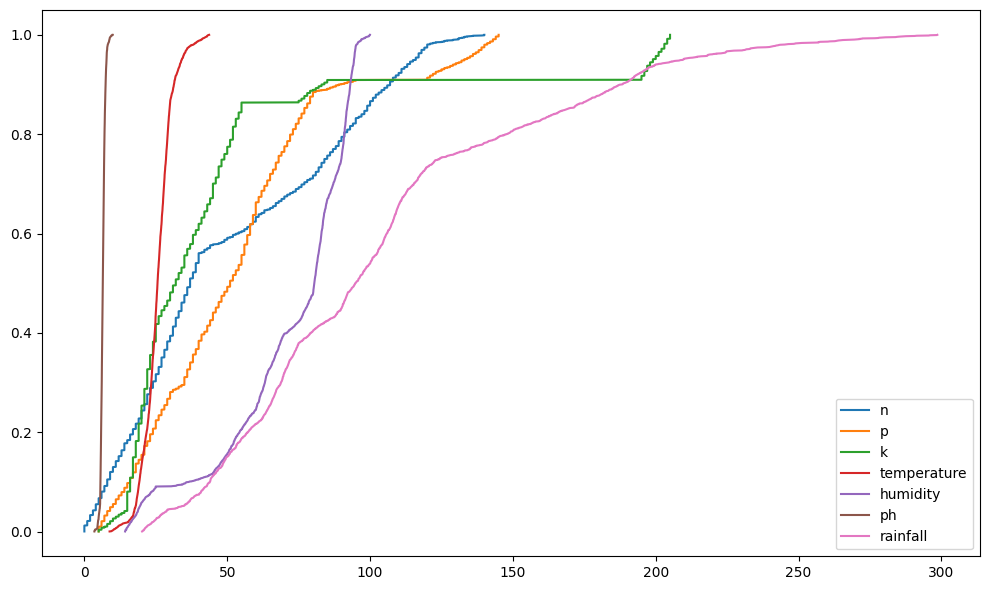

In [14]:
plt.figure(figsize=(10,6))

for c in cols:
    x = df[c].sort_values().to_numpy()
    y = (pd.Series(range(1, len(x)+1)) / len(x)).to_numpy()
    plt.plot(x, y, label=c)

plt.legend()
plt.tight_layout()
plt.show()

# Data Analysis 2 - Exploratory

<Figure size 1200x500 with 0 Axes>

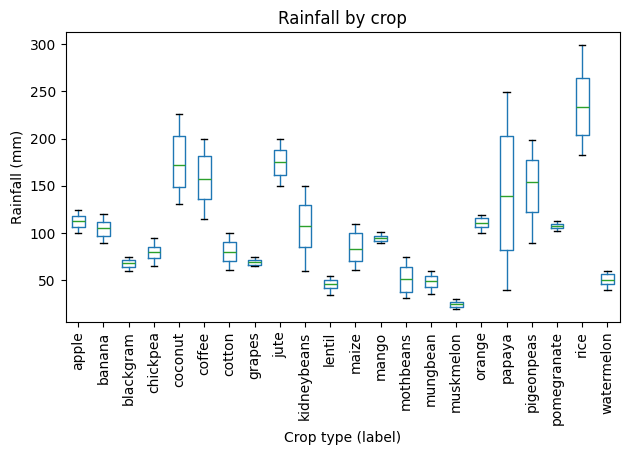

In [22]:
plt.figure(figsize=(12,5))
df.boxplot(column="rainfall", by="label", grid=False)
plt.ylabel("Rainfall (mm)")
plt.xlabel("Crop type (label)")
plt.xticks(rotation=90)
plt.suptitle("")
plt.title("Rainfall by crop")
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

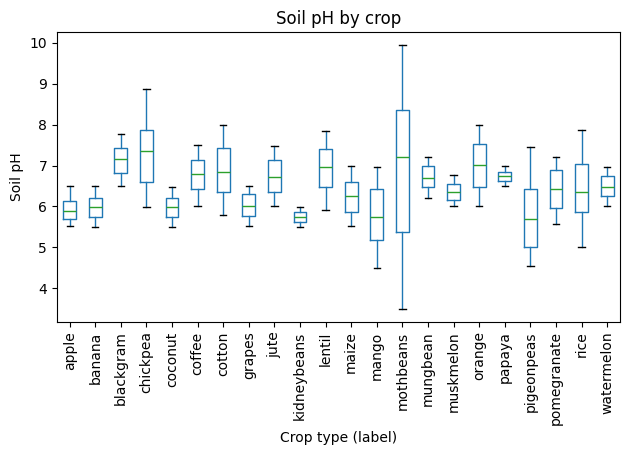

In [23]:
plt.figure(figsize=(12,5))
df.boxplot(column="ph", by="label", grid=False)
plt.ylabel("Soil pH")
plt.xlabel("Crop type (label)")
plt.xticks(rotation=90)
plt.suptitle("")
plt.title("Soil pH by crop")
plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

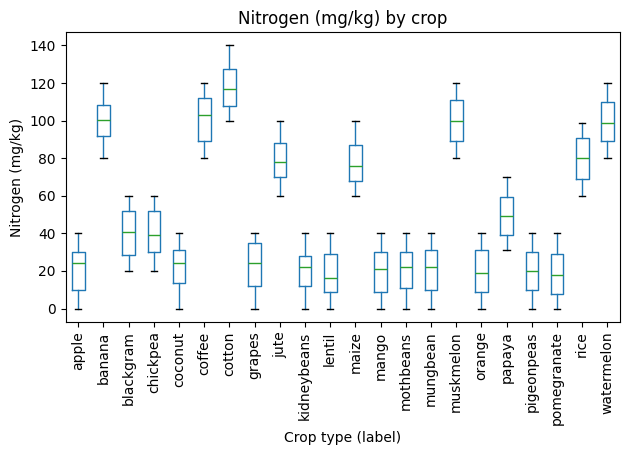

<Figure size 1200x400 with 0 Axes>

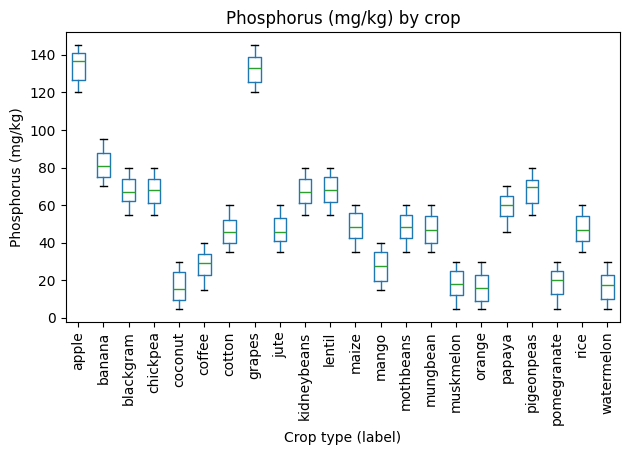

<Figure size 1200x400 with 0 Axes>

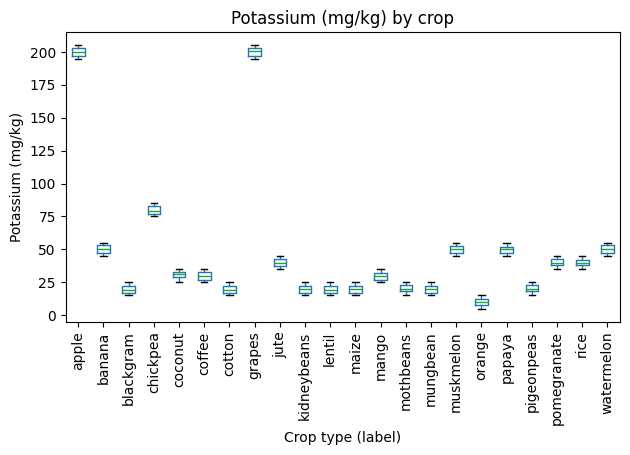

In [24]:
for c, ylab in [("n","Nitrogen (mg/kg)"), ("p","Phosphorus (mg/kg)"), ("k","Potassium (mg/kg)")]:
    plt.figure(figsize=(12,4))
    df.boxplot(column=c, by="label", grid=False)
    plt.ylabel(ylab)
    plt.xlabel("Crop type (label)")
    plt.xticks(rotation=90)
    plt.suptitle("")
    plt.title(f"{ylab} by crop")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1328165874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for lab, g in df.groupby("label"):


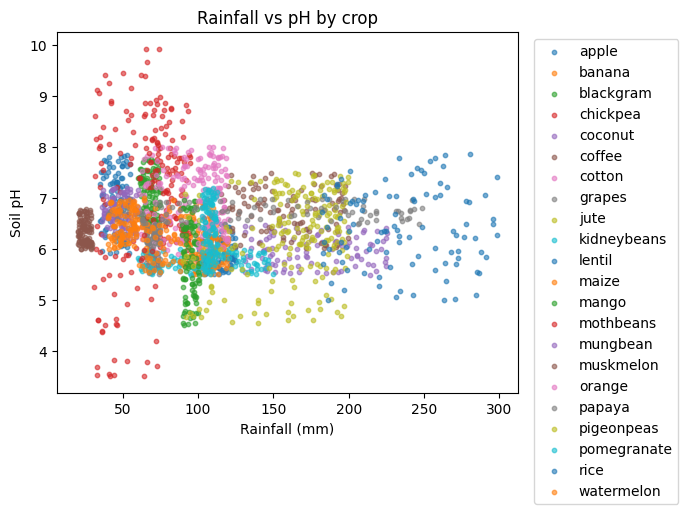

In [25]:
plt.figure(figsize=(7,5))
for lab, g in df.groupby("label"):
    plt.scatter(g["rainfall"], g["ph"], s=10, alpha=0.6, label=lab)

plt.xlabel("Rainfall (mm)")
plt.ylabel("Soil pH")
plt.title("Rainfall vs pH by crop")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4232106239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for lab, g in df.groupby("label"):


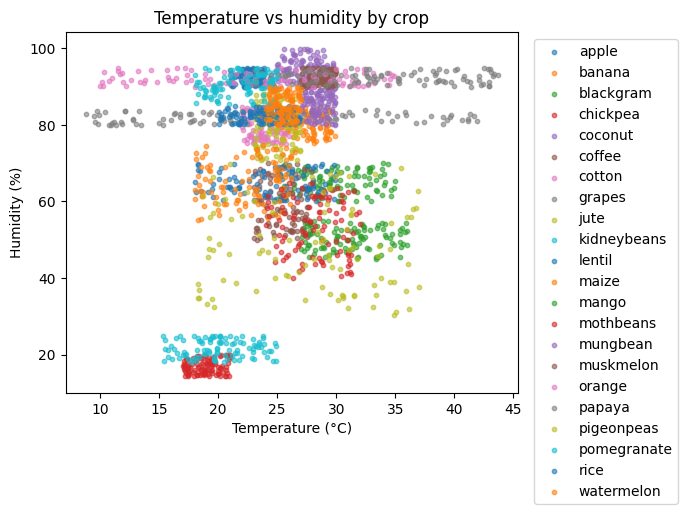

In [26]:
plt.figure(figsize=(7,5))
for lab, g in df.groupby("label"):
    plt.scatter(g["temperature"], g["humidity"], s=10, alpha=0.6, label=lab)

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs humidity by crop")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [28]:
from sklearn.feature_selection import f_classif

X = df[cols]
y = df["label"]

scores, _ = f_classif(X, y)
rank = sorted(zip(cols, scores), key=lambda x: x[1], reverse=True)

rank

[('k', np.float64(27238.362067079233)),
 ('humidity', np.float64(3103.7088912174863)),
 ('p', np.float64(1885.6578591842544)),
 ('n', np.float64(897.5681863257156)),
 ('rainfall', np.float64(605.5279661441336)),
 ('temperature', np.float64(102.18698122995508)),
 ('ph', np.float64(60.34403352941259))]

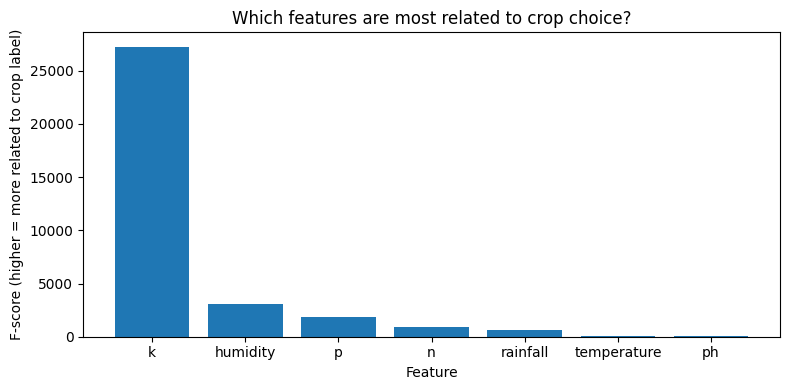

In [29]:
from sklearn.feature_selection import f_classif

cols = ["n","p","k","temperature","humidity","ph","rainfall"]
X = df[cols]
y = df["label"]

scores, _ = f_classif(X, y)
order = sorted(range(len(cols)), key=lambda i: scores[i], reverse=True)

plt.figure(figsize=(8,4))
plt.bar([cols[i] for i in order], [scores[i] for i in order])
plt.xlabel("Feature")
plt.ylabel("F-score (higher = more related to crop label)")
plt.title("Which features are most related to crop choice?")
plt.tight_layout()
plt.show()

# Data Analysis 3 - Predictive

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

cols = ["n","p","k","temperature","humidity","ph","rainfall"]
X = df[cols]
y = df["label"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.nunique()

((1760, 7), (440, 7), 22)

In [32]:
from sklearn.model_selection import cross_val_score

models = {
    "log_reg": make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000)),
    "knn": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7)),
    "rf": RandomForestClassifier(n_estimators=300, random_state=42)
}

scores = {name: cross_val_score(m, X_train, y_train, cv=5, scoring="accuracy").mean()
          for name, m in models.items()}

scores

{'log_reg': np.float64(0.9676136363636363),
 'knn': np.float64(0.9625),
 'rf': np.float64(0.9948863636363636)}

In [33]:
best_name = max(scores, key=scores.get)
best_model = models[best_name]

best_model.fit(X_train, y_train)
test_acc = best_model.score(X_test, y_test)

best_name, scores[best_name], test_acc

('rf', np.float64(0.9948863636363636), 0.9931818181818182)

In [34]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

<Figure size 800x800 with 0 Axes>

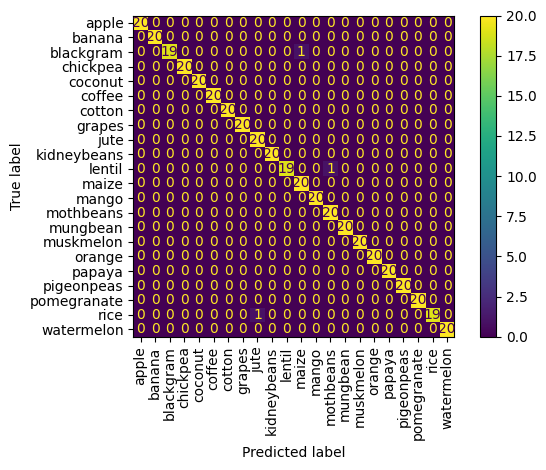

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, xticks_rotation=90)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.inspection import permutation_importance
import pandas as pd

r = permutation_importance(best_model, X_test, y_test, n_repeats=20, random_state=42)
imp = pd.Series(r.importances_mean, index=cols).sort_values(ascending=False)
imp

,0
humidity,0.302500
n,0.209545
rainfall,0.177500
k,0.153636
p,0.112500
ph,0.009659
temperature,0.005795


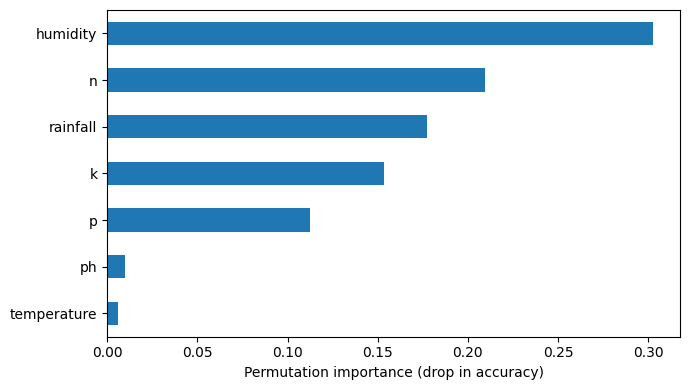

In [37]:
plt.figure(figsize=(7,4))
imp.head(7).sort_values().plot(kind="barh")
plt.xlabel("Permutation importance (drop in accuracy)")
plt.tight_layout()
plt.show()

# Data Analysis 4 - Inferential

In [43]:
import numpy as np
a = df[df["label"]=="rice"]["rainfall"].to_numpy()
b = df[df["label"]=="maize"]["rainfall"].to_numpy()

a.mean(), b.mean(), len(a), len(b)


(np.float64(236.18111359399998), np.float64(84.76698766300002), 100, 100)

In [44]:
diff_hat = a.mean() - b.mean()
diff_hat

np.float64(151.41412593099994)

In [45]:
rng = np.random.default_rng(42)
B = 5000

boot = np.array([
    rng.choice(a, size=len(a), replace=True).mean() -
    rng.choice(b, size=len(b), replace=True).mean()
    for _ in range(B)
])

ci = np.percentile(boot, [2.5, 97.5])
ci

array([144.37085541, 158.71385176])

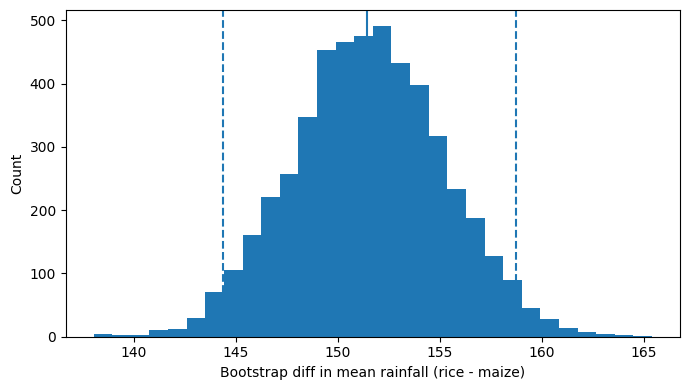

In [46]:
plt.figure(figsize=(7,4))
plt.hist(boot, bins=30)
plt.axvline(diff_hat)
plt.axvline(ci[0], linestyle="--")
plt.axvline(ci[1], linestyle="--")
plt.xlabel("Bootstrap diff in mean rainfall (rice - maize)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

pd.DataFrame({
    "point_estimate": [diff_hat],
    "ci_low_95": [ci[0]],
    "ci_high_95": [ci[1]]
})

,point_estimate,ci_low_95,ci_high_95
0,151.414126,144.370855,158.713852


/tmp/ipython-input-3707661256.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([a, b], labels=["rice", "maize"])


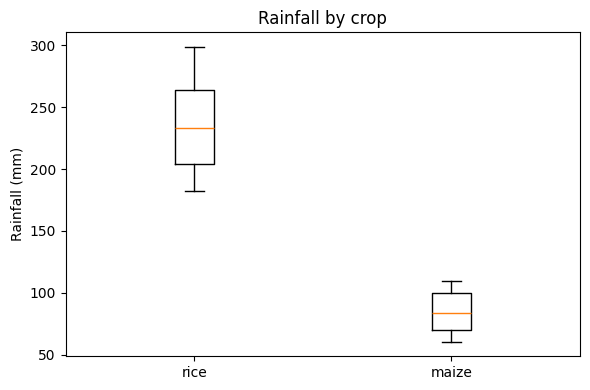

In [48]:
plt.figure(figsize=(6,4))
plt.boxplot([a, b], labels=["rice", "maize"])
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall by crop")
plt.tight_layout()
plt.show()